In [ ]:
# Gerekli kütüphanelerin import edilmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


<h4>1. Veri Setinin Hazırlanması</h4>


In [ ]:
# Veri setinin yüklenmesi ve ilk 5 satırın incelenmesi
df = pd.read_csv('dataset/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# Veri setinin özet istatistikleri
print("----------------Veri Setinin Genel Özellikleri--------------")
print(df.info())

----------------Veri Setinin Genel Özellikleri--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [ ]:
print("Veri setinin istatistiksel özet bilgileri (sayısal özellikler):")
print(df.describe())

Veri setinin istatistiksel özet bilgileri (sayısal özellikler):
                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000

In [ ]:
print("Veri setinin istatistiksel özet bilgileri (kategorik özellikler):")
print(df.describe(include=['O']))

Veri setinin istatistiksel özet bilgileri (kategorik özellikler):
       workclass education      marital-status      occupation relationship  \
count      48842     48842               48842           48842        48842   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       33906     15784               22379            6172        19716   

         race gender native-country income  
count   48842  48842          48842  48842  
unique      5      2             42      2  
top     White   Male  United-States  <=50K  
freq    41762  32650          43832  37155  



Sayısal değişkenlerin dağılımları:


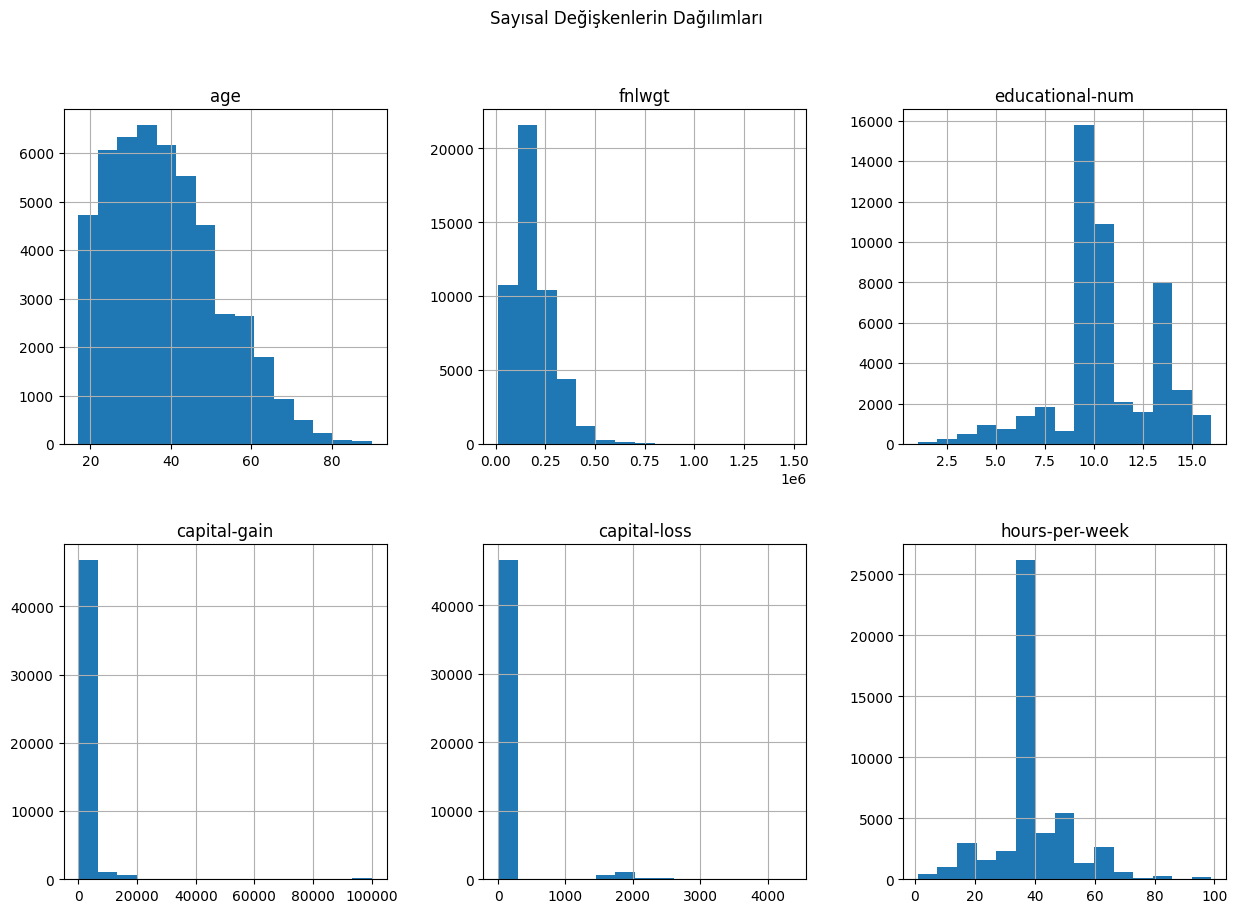

In [ ]:
# Sayısal değişkenler için histogram grafiği
numeric_features = df.select_dtypes(include=[np.number]).columns
print("\nSayısal değişkenlerin dağılımları:")
df[numeric_features].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle("Sayısal Değişkenlerin Dağılımları")
plt.show()

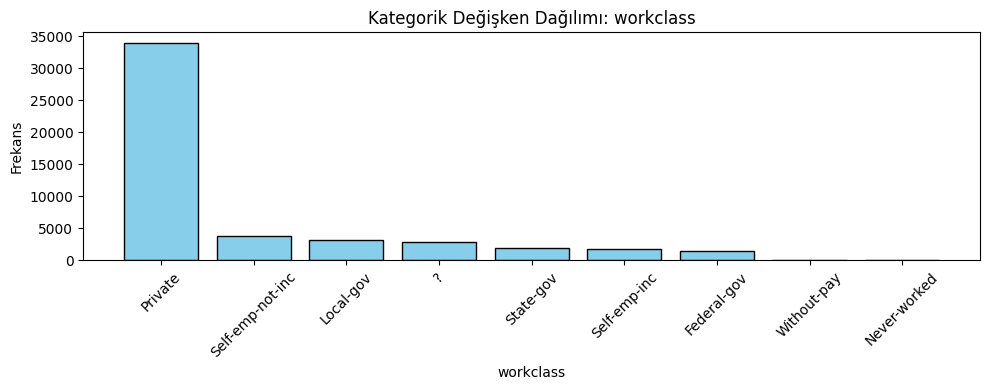

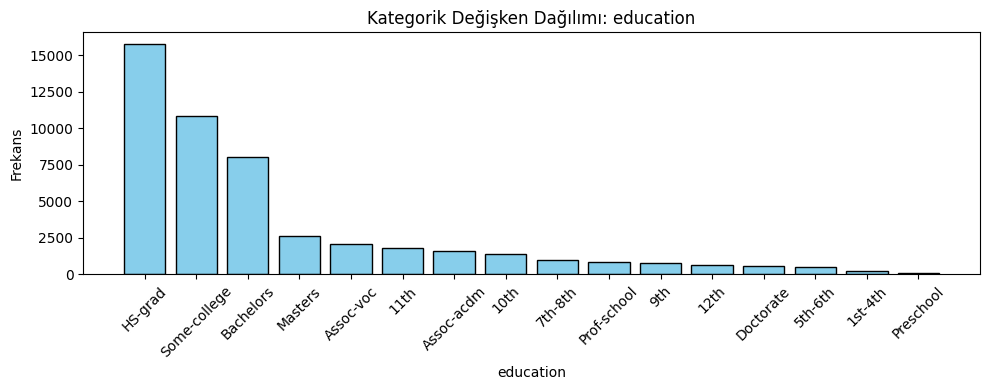

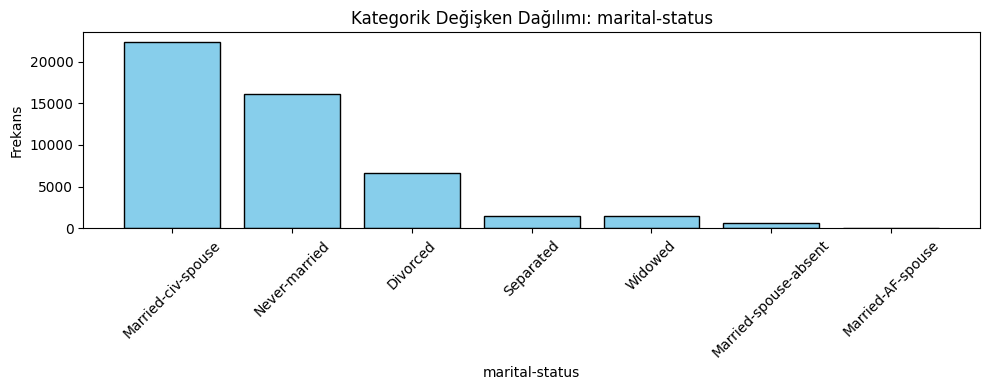

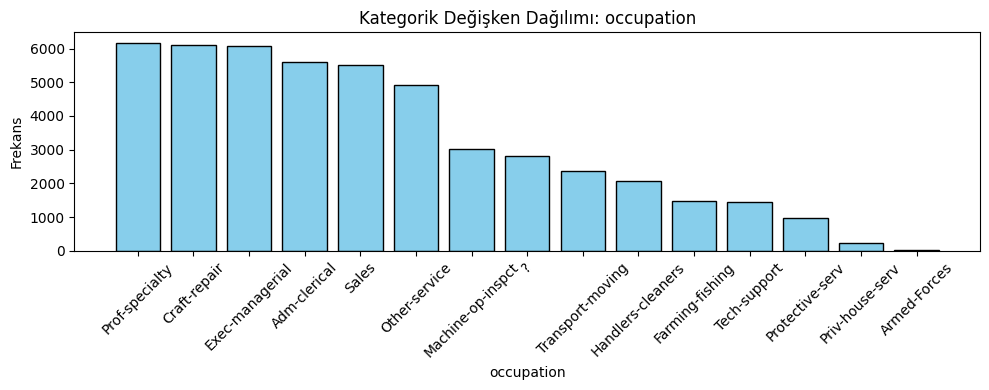

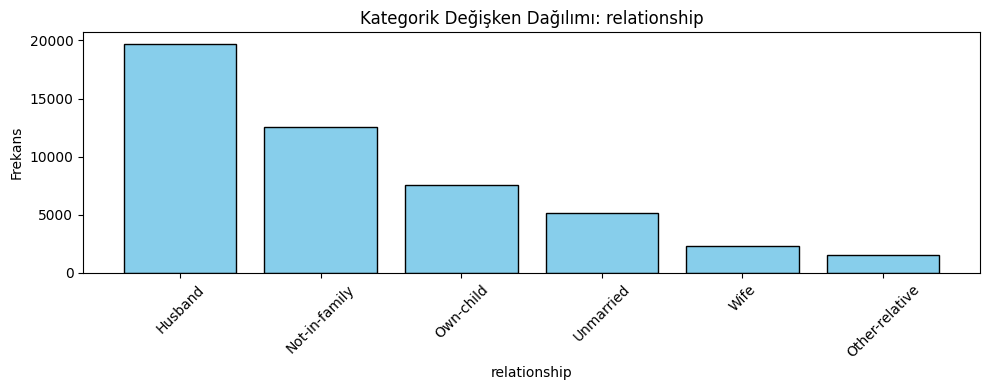

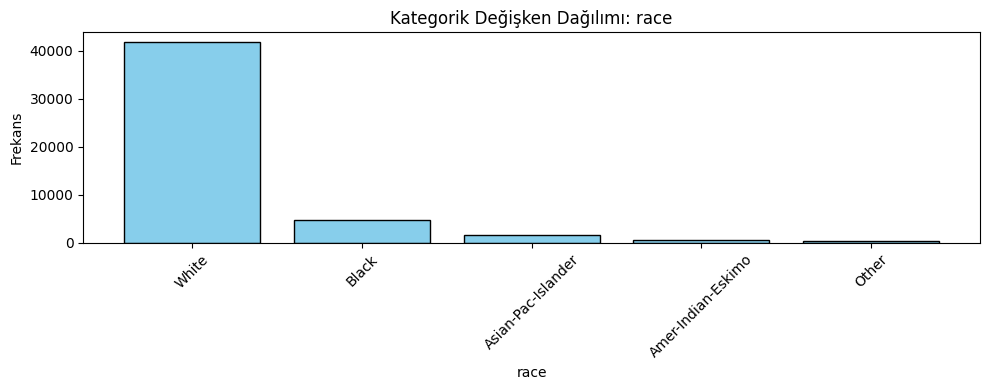

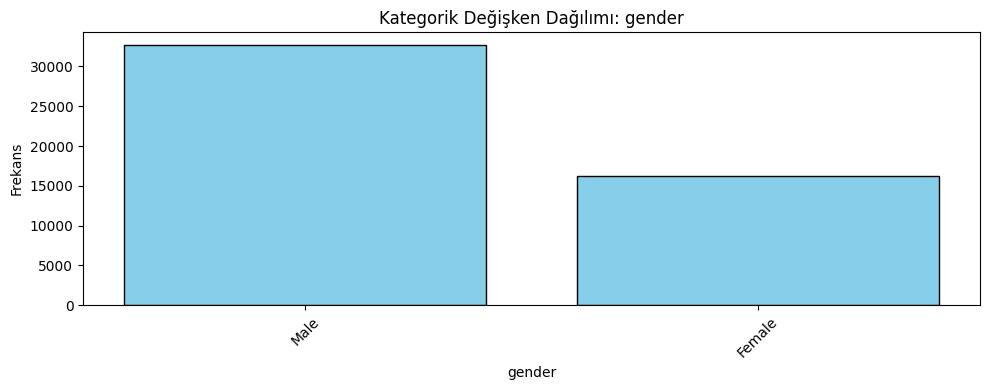

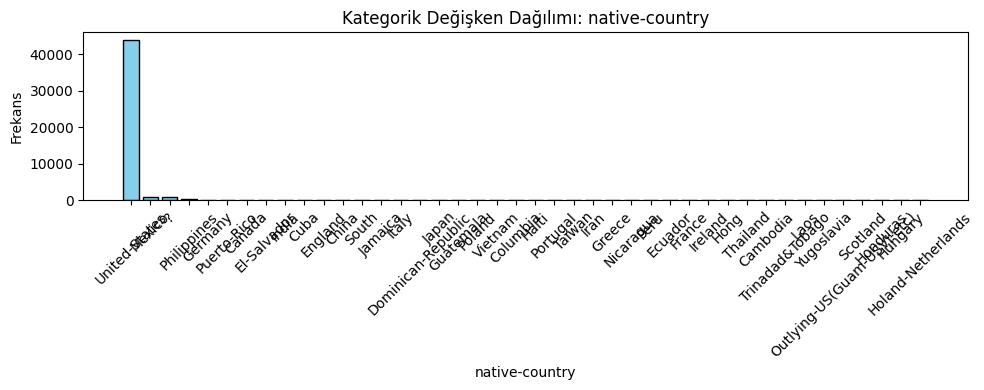

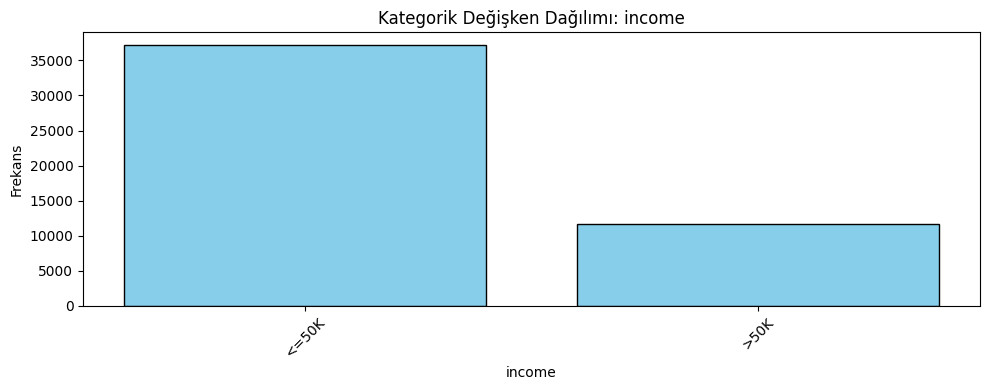

In [ ]:
#Kategorik değişkenler için barplot grafiği
categorical_features = df.select_dtypes(include=['O']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    value_counts = df[feature].value_counts()
    plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    plt.title(f"Kategorik Değişken Dağılımı: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frekans")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Sayısal özelliklerin istatistiksel özetleri
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [ ]:
# Kategorik özelliklerin istatistiksel özetleri
df.describe(include=['O']).transpose()

,count,unique,top,freq
workclass,48842,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,48842,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
gender,48842,2,Male,32650
native-country,48842,42,United-States,43832
income,48842,2,<=50K,37155


In [ ]:
# Veri setindeki "?" değerlerinin NaN ile değiştirilmesi.
missing_patterns = ["?", "N/A", "unknown", ""]
df.replace(missing_patterns, np.nan, inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


<h4>2. Veri Ön İşleme</h4>

In [ ]:
# Eksik Değer Analizi
missing_values = df.isnull().sum()
missing_ratios = (missing_values / len(df)) * 100

missing_data_combined = pd.DataFrame({
    "Eksik Değer Sayısı": missing_values,
    "Eksik Değer Oranı (%)": missing_ratios
})

print(missing_data_combined)

                 Eksik Değer Sayısı  Eksik Değer Oranı (%)
age                               0               0.000000
workclass                      2799               5.730724
fnlwgt                            0               0.000000
education                         0               0.000000
educational-num                   0               0.000000
marital-status                    0               0.000000
occupation                     2809               5.751198
relationship                      0               0.000000
race                              0               0.000000
gender                            0               0.000000
capital-gain                      0               0.000000
capital-loss                      0               0.000000
hours-per-week                    0               0.000000
native-country                  857               1.754637
income                            0               0.000000


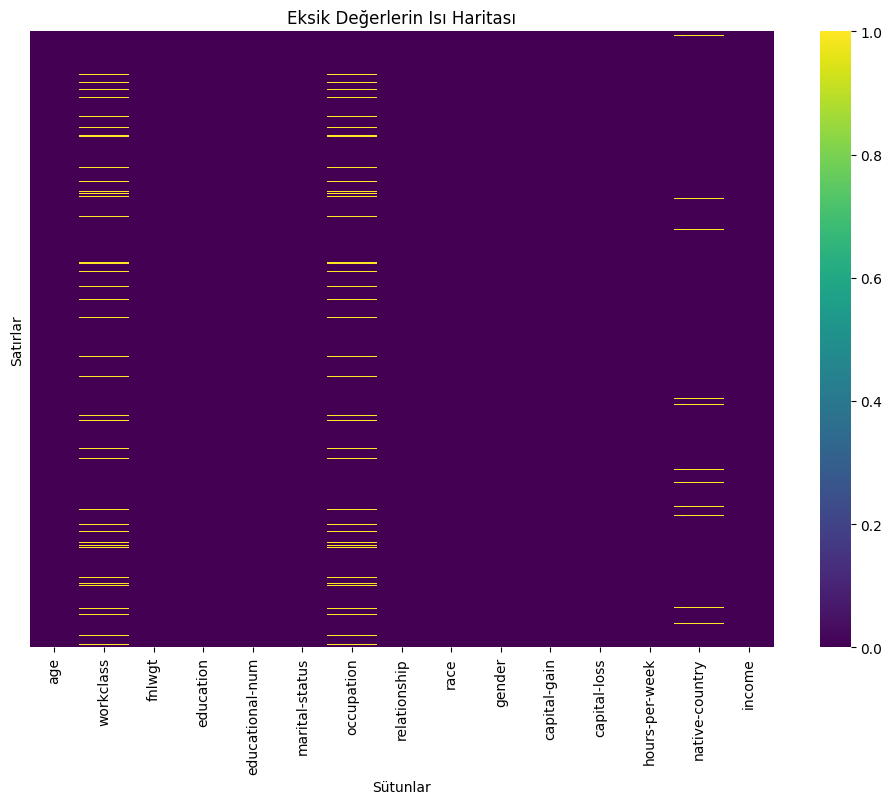

In [ ]:
# Eksik verilerin ısı haritası ile görselleştirmesi
plt.figure(figsize=(12, 8))
plt.title("Eksik Değerlerin Isı Haritası")
sns.heatmap(df.isnull(), cbar=True, cmap="viridis", yticklabels=False)
plt.xlabel("Sütunlar")
plt.ylabel("Satırlar")
plt.show()

In [ ]:
# Eksik değerlerin doldurulması

categorical_cols_with_missing = ['workclass', 'occupation', 'native-country']

df_filled = df.copy()
for col in categorical_cols_with_missing:
    df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])

# Eksik değerlerin tekrar kontrol edilmesi
missing_values_after_fill = df_filled.isnull().sum()

print(missing_values_after_fill)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [ ]:
# Aykırı Değerlerin Analizi
for col in numeric_features:
    Q1 = df_filled[col].quantile(0.25)
    Q3 = df_filled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Alt sınır
    upper_bound = Q3 + 1.5 * IQR  # Üst sınır

    outliers = df_filled[(df_filled[col] < lower_bound) | (df_filled[col] > upper_bound)]
    print(f"{col} sütununda {len(outliers)} aykırı değer bulunuyor.")

age sütununda 216 aykırı değer bulunuyor.
fnlwgt sütununda 1453 aykırı değer bulunuyor.
educational-num sütununda 1794 aykırı değer bulunuyor.
capital-gain sütununda 4035 aykırı değer bulunuyor.
capital-loss sütununda 2282 aykırı değer bulunuyor.
hours-per-week sütununda 13496 aykırı değer bulunuyor.


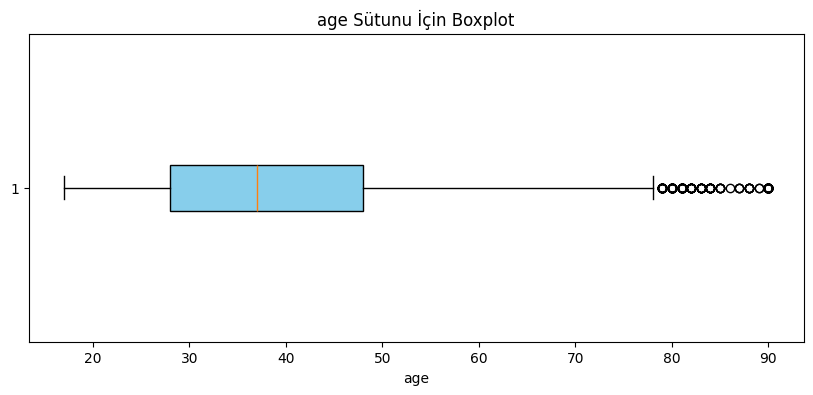

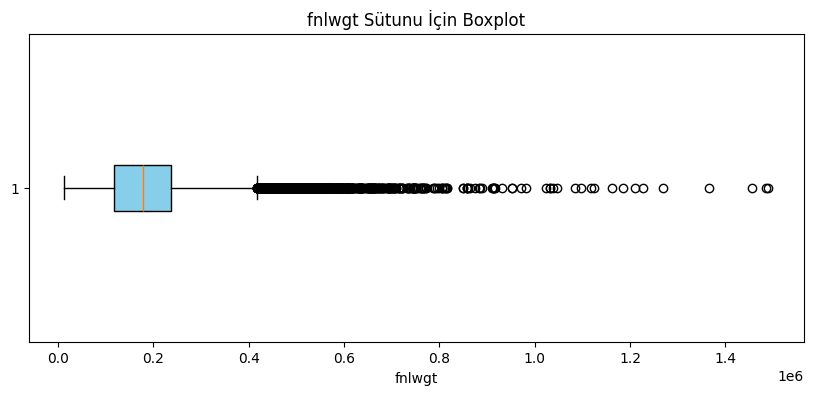

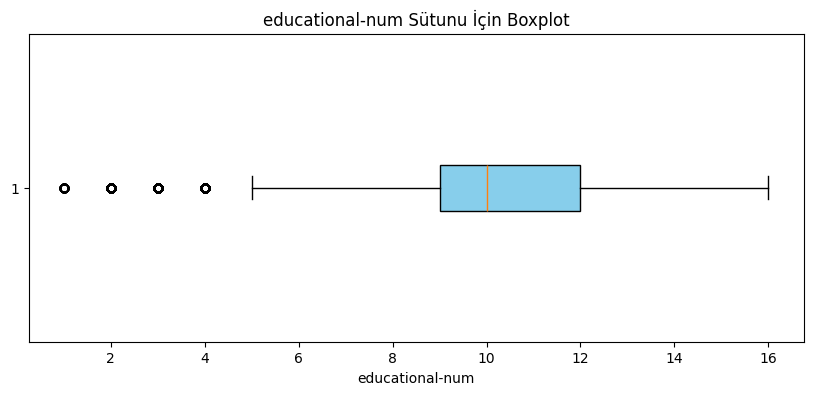

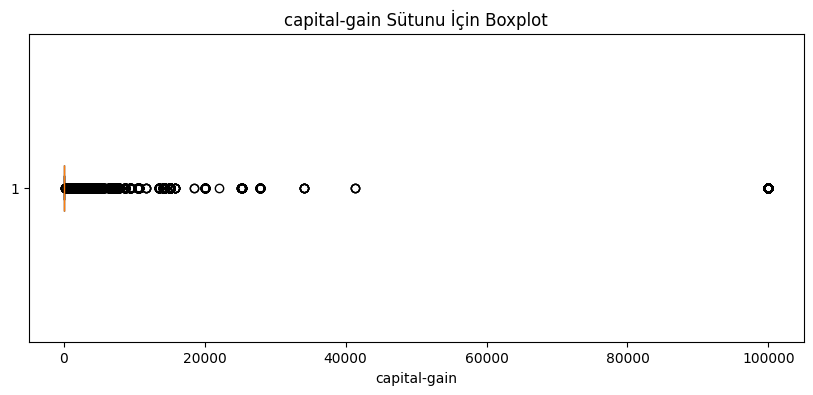

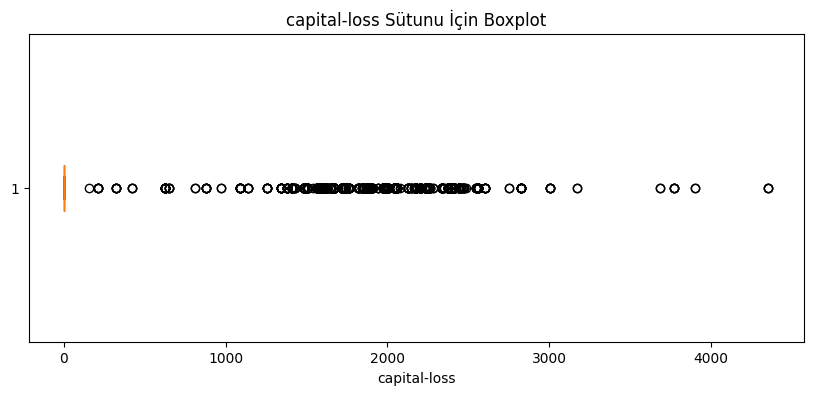

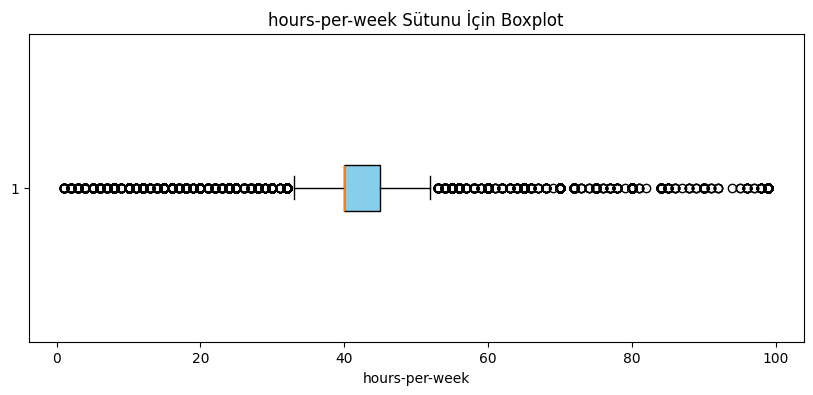

In [ ]:
# Aykırı Değerlerin Görselleştirilmesi
for col in numeric_features:
    plt.figure(figsize=(10, 4))
    plt.boxplot(df_filled[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
    plt.title(f"{col} Sütunu İçin Boxplot")
    plt.xlabel(col)
    plt.show()

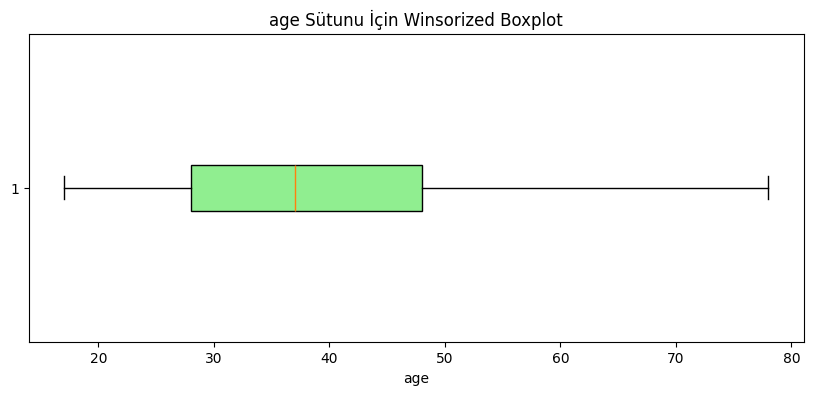

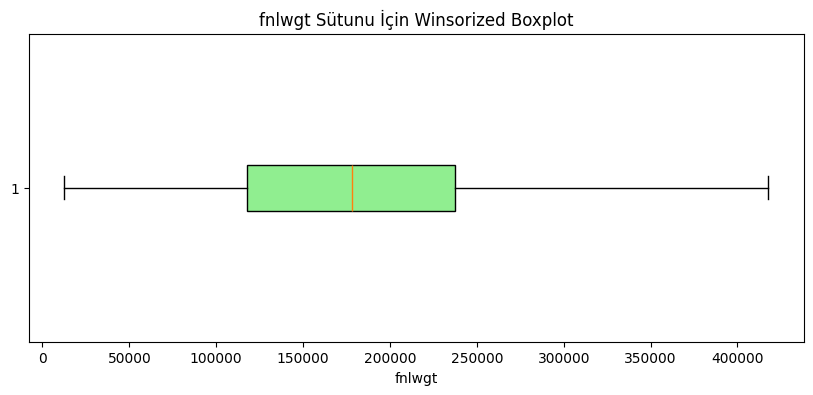

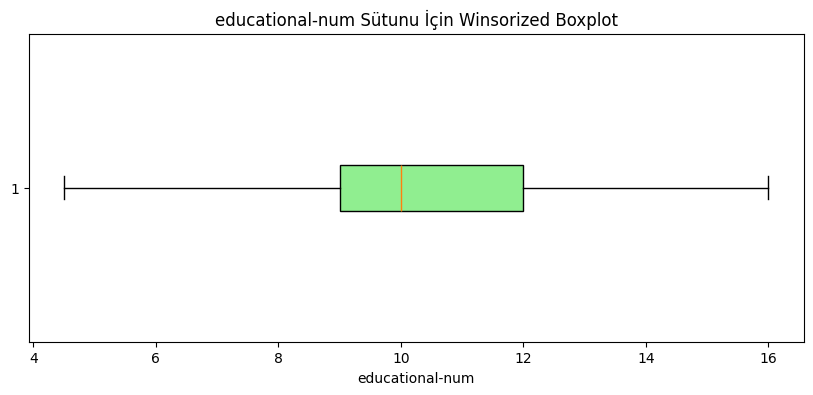

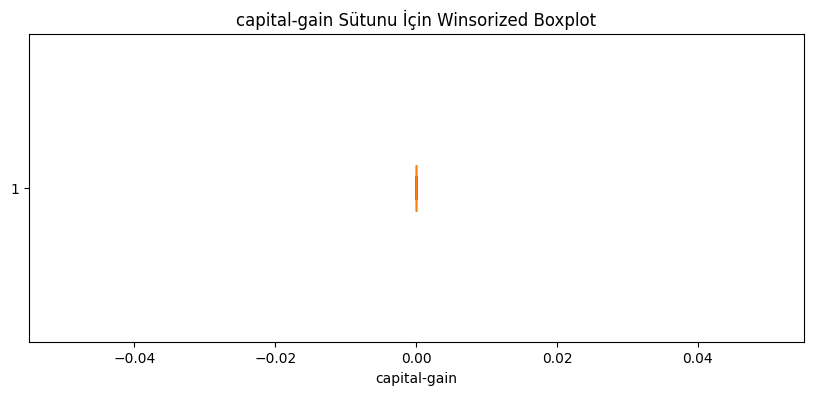

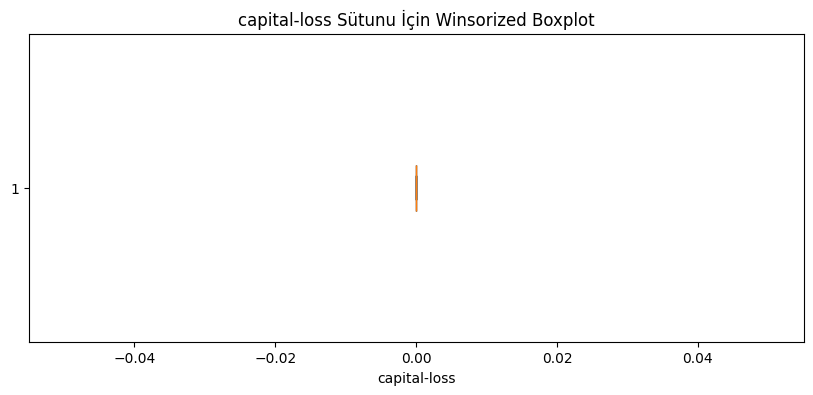

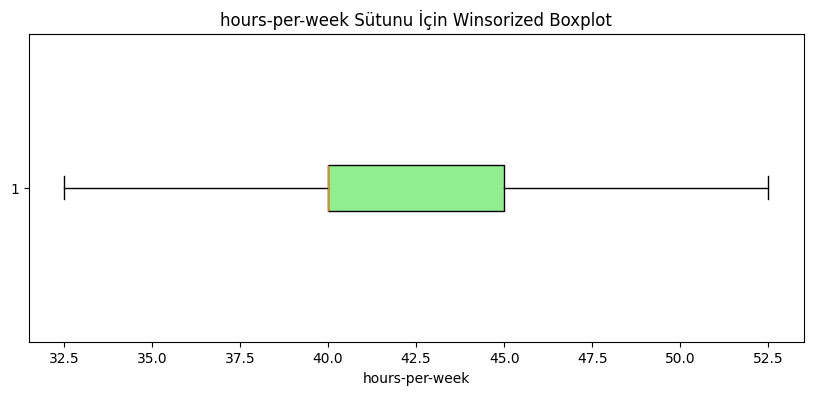

In [ ]:
# Aykırı değerlerin sınır değerler ile doldurulması
df_winsorized = df_filled.copy()
for col in numeric_features:
    Q1 = df_winsorized[col].quantile(0.25)
    Q3 = df_winsorized[col].quantile(0.75)
    IQR = Q3 - Q1  # IQR hesaplama
    lower_bound = Q1 - 1.5 * IQR  # Alt sınır
    upper_bound = Q3 + 1.5 * IQR  # Üst sınır

    df_winsorized[col] = df_winsorized[col].clip(lower=lower_bound, upper=upper_bound)

# Winsorizing sonrası boxplot görselleştirme
for col in numeric_features:
    plt.figure(figsize=(10, 4))
    plt.boxplot(df_winsorized[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
    plt.title(f"{col} Sütunu İçin Winsorized Boxplot")
    plt.xlabel(col)
    plt.show()

In [ ]:
#Yeni Özniteliklerin Oluşturulması:

# 1. 'age' özelliğini kategorilere bölerek yeni bir öznitelik oluşturulması (Genç, Orta Yaşlı, Yaşlı)
df_winsorized['age_group'] = pd.cut(
    df_winsorized['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Middle-aged', 'Older', 'Senior']
)

# 2. 'hours-per-week'  özelliğini kategorilere bölerek yeni bir öznitelik oluşturulması (Part-time, Full-time, Over-time)
df_winsorized['work_hours_category'] = pd.cut(
    df_winsorized['hours-per-week'], bins=[0, 20, 40, 100], labels=['Part-time', 'Full-time', 'Over-time']
)

# 3. 'capital-gain' ve 'capital-loss' durumu (Sermaye durumu: Nötr, Kazanç, Kayıp)
df_winsorized['capital_status'] = pd.cut(
    df_winsorized['capital-gain'] - df_winsorized['capital-loss'],
    bins=[-float('inf'), -1, 1, float('inf')],
    labels=['Loss', 'Neutral', 'Gain']
)

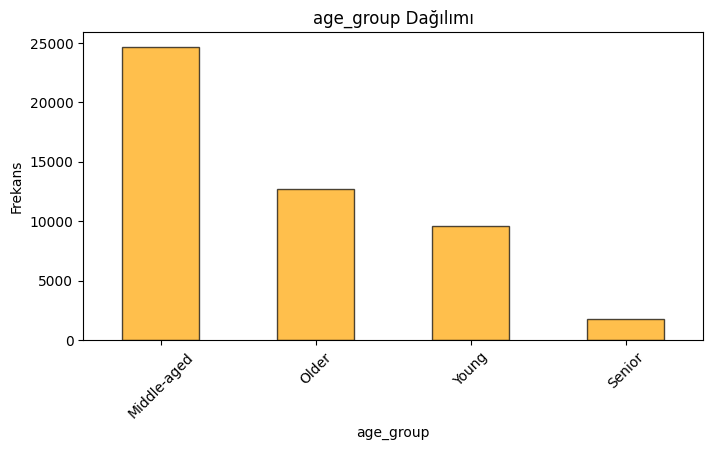

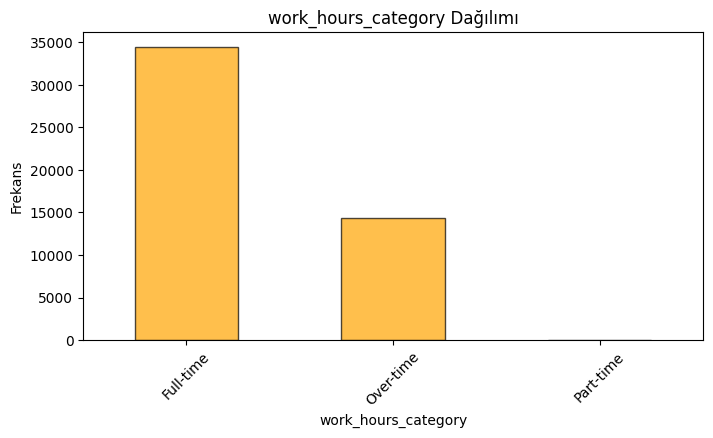

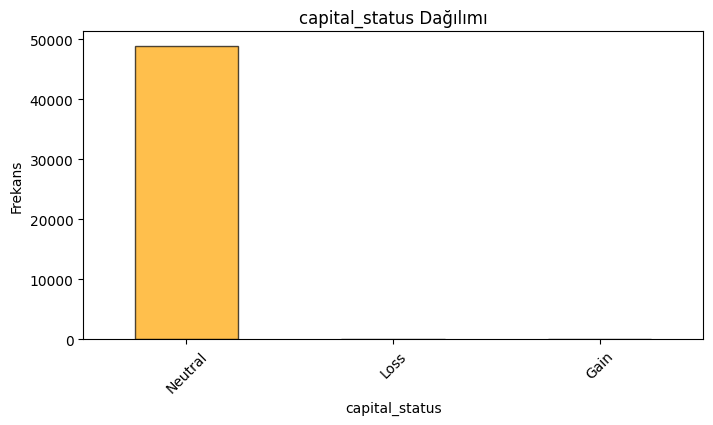

,age_group,work_hours_category,capital_status
0,Young,Full-time,Neutral
1,Middle-aged,Over-time,Neutral
2,Middle-aged,Full-time,Neutral
3,Middle-aged,Full-time,Neutral
4,Young,Full-time,Neutral


In [ ]:
# Yeni özniteliklerin dağılımları

new_features = ['age_group', 'work_hours_category', 'capital_status']

for feature in new_features:
    plt.figure(figsize=(8, 4))
    df_winsorized[feature].value_counts().plot(kind='bar', color='orange', edgecolor='black', alpha=0.7)
    plt.title(f"{feature} Dağılımı")
    plt.xlabel(feature)
    plt.ylabel("Frekans")
    plt.xticks(rotation=45)
    plt.show()

df_winsorized[new_features].head()

In [ ]:
# Kategorik Değişkenlerin Dönüştürülmesi

df_winsorized['age_group'] = df_winsorized['age_group'].astype('object')
df_winsorized['work_hours_category'] = df_winsorized['work_hours_category'].astype('object')
df_winsorized['capital_status'] = df_winsorized['capital_status'].astype('object')

categorical_columns = df_winsorized.select_dtypes(include=['object']).columns
print("Kategorik Sütunlar:", categorical_columns)

Kategorik Sütunlar: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income',
       'age_group', 'work_hours_category', 'capital_status'],
      dtype='object')


In [ ]:
# One Hot Encoding İşlemi

categorical_columns = df_winsorized.select_dtypes(include=['object', 'category']).columns
categorical_columns = categorical_columns.drop('income')

df_encoded = pd.get_dummies(df_winsorized, columns=categorical_columns, drop_first=True)
df_encoded['income'] = df_winsorized['income'].apply(lambda x: 1 if x == '>50K' else 0)

# İşlem sonrası veri setini kontrol etme
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 102 entries, age to work_hours_category_Over-time
dtypes: bool(95), float64(3), int64(4)
memory usage: 7.0 MB


In [ ]:
# StandardScaler kullanarak standartlaştırma işlemi
numeric_features_encoded = df_encoded.select_dtypes(include=[float, int]).columns.drop('income')

scaler = StandardScaler()
df_scaled = df_encoded.copy()

df_scaled[numeric_features_encoded] = scaler.fit_transform(df_scaled[numeric_features_encoded])
df_standardized_summary = df_scaled[numeric_features_encoded].describe().transpose()

# Özet istatistikleri görselleştirme
df_standardized_summary

,count,mean,std,min,25%,50%,75%,max
age,48842.0,2.219991e-16,1.00001,-1.586076,-0.779046,-0.118748,0.688282,2.889274
fnlwgt,48842.0,1.600256e-17,1.00001,-1.830379,-0.726129,-0.090490,0.533647,2.423311
educational-num,48842.0,-3.305256e-16,1.00001,-2.288313,-0.456714,-0.049692,0.764352,2.392440
capital-gain,48842.0,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
capital-loss,48842.0,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
hours-per-week,48842.0,4.614556e-16,1.00001,-1.405526,-0.192863,-0.192863,0.615579,1.828242


In [ ]:
# Veri ön işleme işlemlerinden sonra anlaşılır olması için veri seti adı df_final olarak düzenlendi.
df_final=df_scaled.copy()
df_final.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age_group_Older,age_group_Senior,age_group_Young,work_hours_category_Over-time
0,-0.999145,0.419934,-1.270758,0.0,0.0,-0.192863,0,False,False,True,...,False,False,False,True,False,False,False,False,True,False
1,-0.045382,-1.017089,-0.456714,0.0,0.0,1.424021,0,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,-0.779046,1.575412,0.764352,0.0,0.0,-0.192863,1,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0.394816,-0.277440,-0.049692,0.0,0.0,-0.192863,1,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,-1.512710,-0.873553,-0.049692,0.0,0.0,-1.405526,0,False,False,True,...,False,False,False,True,False,False,False,False,True,False


<h4>3. Veri Setinin Bölünmesi </h4>

In [ ]:
# Veri Setinin Bölünmesi
X = df_final.drop(columns=['income'])
y = df_final['income']

# Veri setini eğitim ve test kümelerine ayırma (%80 eğitim - %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bölünme sonrası boyutları kontrol etme
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39073, 101), (9769, 101), (39073,), (9769,))

<h4>4. Model Kurulumu </h4>

In [ ]:
# 1. LOJİSTİK REGRESYON
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Performans Değerlendirme
logistic_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Precision": precision_score(y_test, y_pred_logistic),
    "Recall": recall_score(y_test, y_pred_logistic),
    "F1 Score": f1_score(y_test, y_pred_logistic),
}

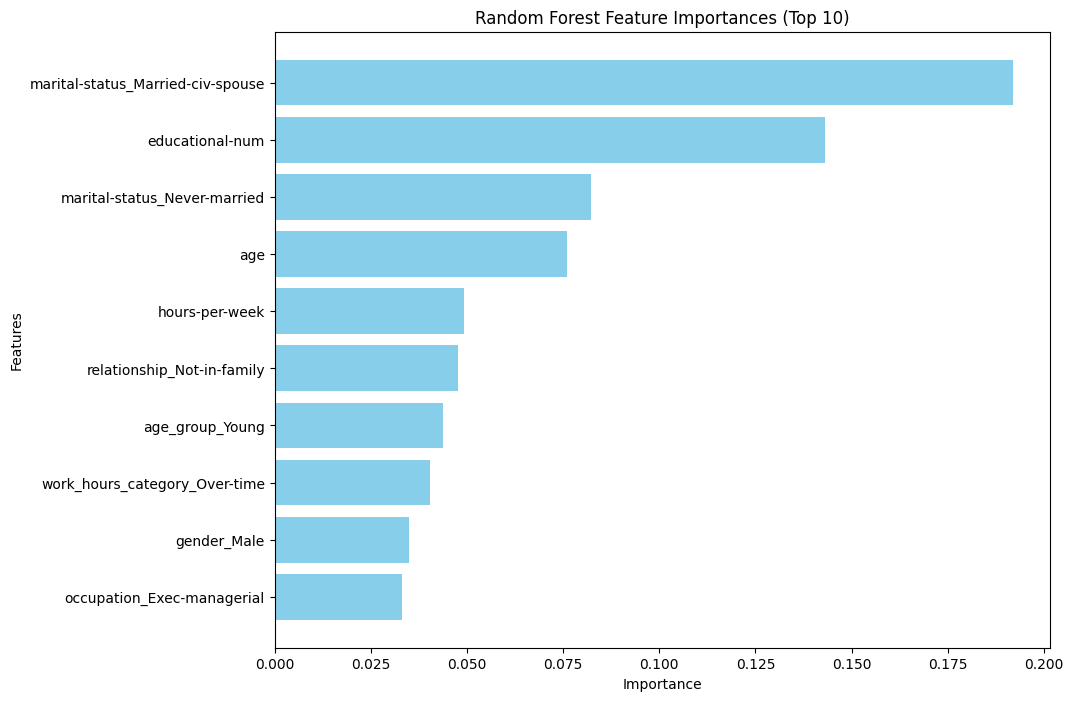

In [ ]:
# 2. RANDOM FOREST
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Performans Değerlendirme
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf),
}

rf_feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Random Forest Feature Importances Plot
plt.figure(figsize=(10, 8))
plt.barh(rf_feature_importances['Feature'][:10], rf_feature_importances['Importance'][:10], color='skyblue')
plt.title("Random Forest Feature Importances (Top 10)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

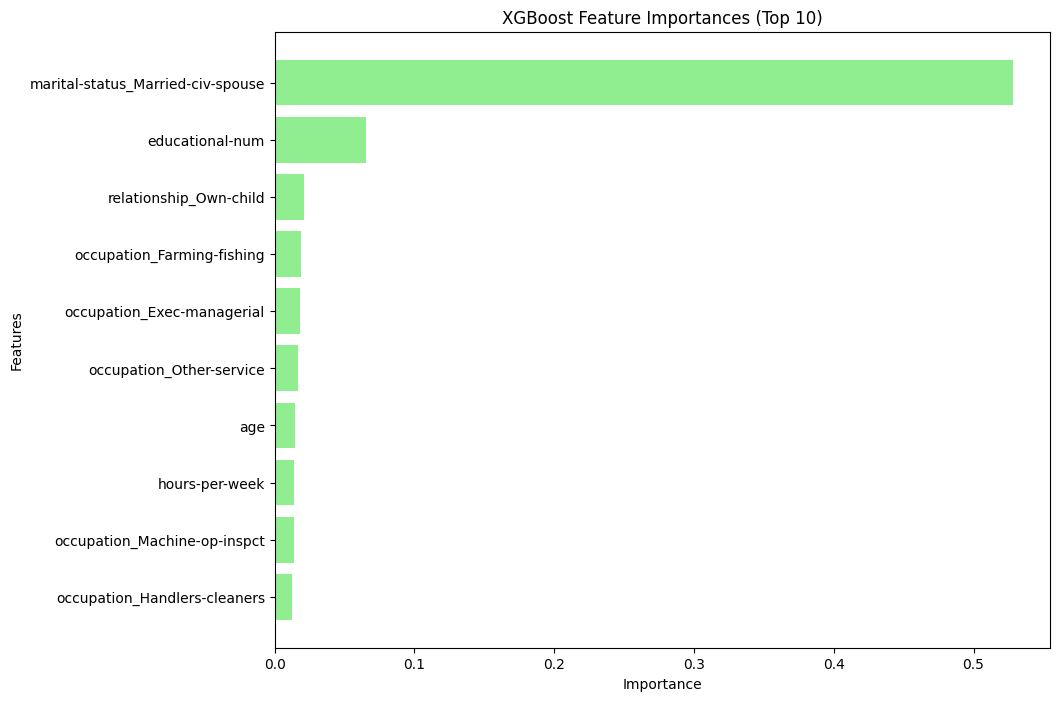

In [ ]:
# 3. XGBoost
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Performans Değerlendirme
xgb_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1 Score": f1_score(y_test, y_pred_xgb),
}

xgb_feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# XGBoost Feature Importances Plot
plt.figure(figsize=(10, 8))
plt.barh(xgb_feature_importances['Feature'][:10], xgb_feature_importances['Importance'][:10], color='lightgreen')
plt.title("XGBoost Feature Importances (Top 10)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()


<h4>5. Model Performansının İncelenmesi</h4>

In [ ]:
# Performans metriklerini birleştirme
all_metrics = pd.DataFrame({
    "Metric": list(logistic_metrics.keys()),
    "Logistic Regression": list(logistic_metrics.values()),
    "Random Forest": list(rf_metrics.values()),
    "XGBoost": list(xgb_metrics.values())
})

print(all_metrics)


      Metric  Logistic Regression  Random Forest   XGBoost
0   Accuracy             0.844099       0.836626  0.850752
1  Precision             0.707409       0.745403  0.717801
2     Recall             0.571179       0.460262  0.598690
3   F1 Score             0.632037       0.569114  0.652857


<h4>6. Model Optimizasyonu</h4>

In [ ]:
# En iyi performansı veren model: XGBoost
# XGBoost modeli için GridSearchCV ile hiperparametre optimizasyonu

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    verbose=1,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)

# En iyi parametreler ve en iyi skor
best_params = xgb_grid.best_params_
best_score = xgb_grid.best_score_

best_xgb_model = xgb_grid.best_estimator_
y_pred_optimized = best_xgb_model.predict(X_test)

# Performans Değerlendirme
optimized_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_optimized),
    "Precision": precision_score(y_test, y_pred_optimized),
    "Recall": recall_score(y_test, y_pred_optimized),
    "F1 Score": f1_score(y_test, y_pred_optimized),
}


Fitting 3 folds for each of 54 candidates, totalling 162 fits


<h4>7. Sonuçların Karşılaştırılması</h4>

      Metric  Logistic Regression  Random Forest   XGBoost  \
0   Accuracy             0.844099       0.836626  0.850752   
1  Precision             0.707409       0.745403  0.717801   
2     Recall             0.571179       0.460262  0.598690   
3   F1 Score             0.632037       0.569114  0.652857   

   XGBoost (Optimized)  
0             0.849831  
1             0.712223  
2             0.603057  
3             0.653109  


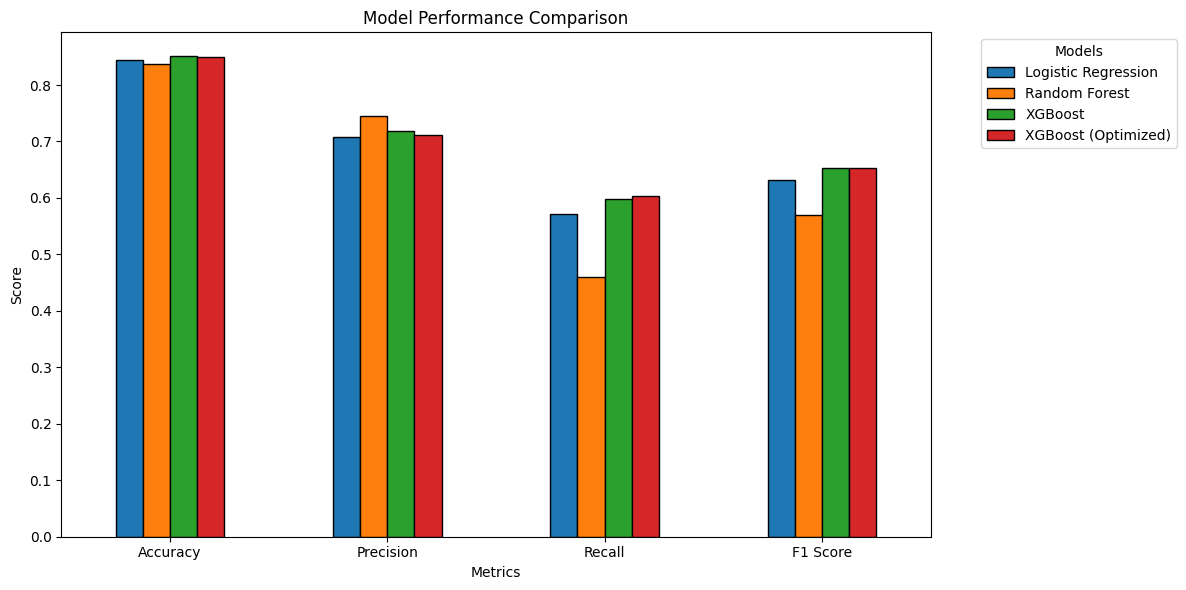

In [ ]:

# Performans metriklerini kullanarak karşılaştırma tablosu oluşturma

performance_comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Logistic Regression": [
        logistic_metrics["Accuracy"],
        logistic_metrics["Precision"],
        logistic_metrics["Recall"],
        logistic_metrics["F1 Score"]
    ],
    "Random Forest": [
        rf_metrics["Accuracy"],
        rf_metrics["Precision"],
        rf_metrics["Recall"],
        rf_metrics["F1 Score"]
    ],
    "XGBoost": [
        xgb_metrics["Accuracy"],
        xgb_metrics["Precision"],
        xgb_metrics["Recall"],
        xgb_metrics["F1 Score"]
    ],
    "XGBoost (Optimized)": [
        optimized_metrics["Accuracy"],
        optimized_metrics["Precision"],
        optimized_metrics["Recall"],
        optimized_metrics["F1 Score"]
    ]
})

print(performance_comparison)


# Bar grafiği ile modellerin karşılaştırılması
performance_comparison.set_index("Metric", inplace=True)
performance_comparison.plot(kind="bar", figsize=(12, 6), edgecolor='black')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()